In [41]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from scipy.stats import t, ttest_1samp, ttest_ind

In [2]:
data = pd.read_csv('../data/diamonds_train.csv')

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [5]:
x_filter = data['x']==0
y_filter = data['y']==0
z_filter = data['z']==0

data.drop(data[(x_filter | y_filter | z_filter)].index, inplace=True)

In [6]:
data[data['y']==data['y'].max()]
data.drop(14708, inplace=True)

**Test 1 - One sample vs constant hypothesis test.** 

We know from the available literature that diamonds average price rounds about 4000 USD. The aim is to test whether the prices in our sample are significantly different from the literature value. Give some conclusions about the implications of your test results.

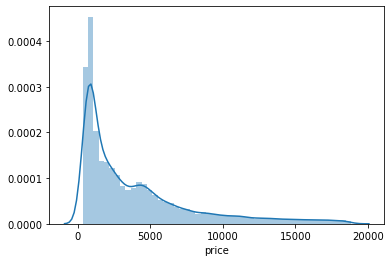

In [13]:
sns.distplot(data['price']);

In [52]:
# H0 la media del precio de nuestro dataset es igual a 4000

In [58]:
# handmade

mu_hat= data['price'].mean()
sigma_hat = data['price'].std()
print(f'data mean = {mu_hat},\ndata standard deviation = {sigma_hat}')

n = len(data['price'])
mu = 4000

t_handmade = (mu_hat - mu) / (sigma_hat / np.sqrt(n))
print(f'statistic t = {t_handmade}')

rv = t(df=n-1)
print(f'p_value = {rv.cdf(t_handmade)}')

rv.cdf(t_handmade)*2 < 0.05

data mean = 3926.3306048766012,
data standard deviation = 3989.8611910616073
statistic t = -3.7129931782431633
p_value = 0.00010254866928494984


True

In [50]:
# la media de nuestro dataset está por debajo de 4000 (el estadístico t es negativo)

In [53]:
# la media de nuestro dataset es diferente de 4000 y no es casualidad xq el p_value es menor de 0.05

In [ ]:
# rechazamos H0, es decir la media de los precios es significativamente distinta de 4000

In [46]:
# scipy

test_results = ttest_1samp(data['price'], 4000)
display(f'statistic t = {test_results.statistic}', f'p_value = {test_results.pvalue}')
display(test_results.pvalue < 0.05)

'statistic t = -3.7129931782431633'

'p_value = 0.0002050973385698997'

True

**Test 2 - Two independent samples.**

Our sample includes diamonds with different features (carat, cut, color clarity, etc.). It seems clear that the carat plays an important role in price. However, it's not that clear whether the prices of some "sub-groups" are significantly different from each other. These are the "sub-groups" that you might feel suspicious about it:

In [59]:
# H0 que los precios medios de los dos grupos son iguales

**Sub-Test 1:** Fair cut + color G vs. Fair cut + color I


In [29]:
color_filter = data['color']=='G'
cut_filter = data['cut']=='Fair'

set_1 = data[color_filter & cut_filter]

In [30]:
color_filter = data['color']=='I'
cut_filter = data['cut']=='Fair'

set_2 = data[color_filter & cut_filter]

In [37]:
ttest_ind(set_1['price'], set_2['price'], equal_var=False)

Ttest_indResult(statistic=0.015041130667131423, pvalue=0.9880088878309196)

pasaría el test xq el pvalue es menor de 0.05 si pasa el test es q hay una media significativamente distinta entre las dos muestras. 